# Makine Öğrenmesi Metodları

## 9.1 Regresyon Nedir?

Regresyon analizi, istatistik ve makine öğrenmesindeki en önemli alanlardan biridir. Mevcut birçok regresyon yöntemi vardır. Doğrusal regresyon bunlardan biridir.

Regresyon, değişkenler arasındaki ilişkileri arar. Örneğin, bir şirketin birkaç çalışanını gözlemleyebilir ve maaşlarının deneyim, eğitim düzeyi, rol, çalıştıkları şehir gibi özelliklere nasıl bağlı olduğunu anlamaya çalışabilirsiniz.

## 9.2 Lineer Regresyon

Doğrusal regresyon, muhtemelen en önemli ve yaygın olarak kullanılan regresyon tekniklerinden biridir. En basit regresyon yöntemleri arasındadır. Başlıca avantajlarından biri, sonuçları yorumlama kolaylığıdır.

Bağımsız değişkenler kümesi 𝐱 = (𝑥₁,…, 𝑥ᵣ) üzerinde bazı bağımlı değişkenlerin doğrusal regresyonunu uygularken, burada 𝑟 yordayıcı sayısıdır, 𝑦 ve 𝐱 arasında doğrusal bir ilişki varsayarsınız: 𝑦 = 𝛽₀ + 𝛽₁𝑥₁ + ⋯ + 𝛽ᵣ𝑥ᵣ + 𝜀. Bu denklem, regresyon denklemidir. 𝛽₀, 𝛽₁,…, 𝛽ᵣ regresyon katsayılarıdır ve 𝜀 rastgele hatadır.

### Basit Lineer Regresyon

Basit veya tek değişkenli doğrusal regresyon, tek bir bağımsız değişkenle doğrusal regresyonun en basit halidir, 𝐱 = 𝑥.

![](assets/linear-regression.png)

Tahmini regresyon fonksiyonu (kırmızı çizgi) 𝑓 (𝑥) = 𝑏₀ + 𝑏₁𝑥 denklemine sahiptir. Amacınız, kareli artıkların toplamını (SSR) en aza indiren ve tahmini regresyon fonksiyonunu belirleyen tahmini ağırlıkların 𝑏₀ ve 𝑏₁ optimal değerlerini hesaplamaktır.

## İçeri Aktarma

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

In [2]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=100, n_features=1, noise=5)

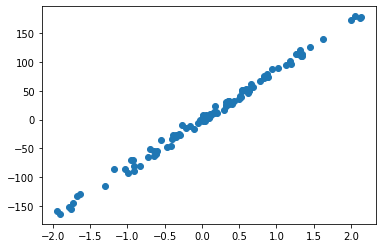

In [3]:
plt.scatter(X, y)

## Model yaratma

In [4]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

##  Sonuçları alma

In [20]:
r_sq = model.score(X, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.4695132985395599


In [21]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 0.036574403976687986
slope: [5.44409786]


## Tahmin

In [5]:
X_test, _ = make_regression(n_samples=100, n_features=1, noise=20)
y_pred = model.predict(X_test)

In [6]:
print('predicted response:', y_pred, sep='\n')

predicted response:
[  93.30454052  -23.79399204  -66.33513763    2.77517377  -79.00545588
  -40.91248411  129.38289482   36.05904683  -44.31110388  112.39371763
  -63.55242366  -71.86029774  -38.62031159  -47.55912611  -90.40513804
   -6.31860288  122.34306798 -161.0148302    27.04008304    9.7233292
 -123.04789018   44.91481711   55.44377719 -105.28418561  102.82453766
   67.65112658   -4.47444675 -235.65987385  156.41679989  -53.32213838
 -178.49843967  -86.86014976   51.58375308 -160.53660937   20.05892006
   88.04801716  -22.54272381   14.17337064   82.76164546  -68.64462516
  -52.06474727   52.63018896   59.30307809   32.26933669  -99.2685576
   43.65876767   67.51811518 -116.68239667 -140.94591214   72.54299121
  -90.5267648  -100.39658611   82.59804672   58.02164152 -118.39849276
  -34.30870271    1.1279068    -5.44202297  -67.6308882   -21.29049899
  -27.11452216  129.65467566    3.49206112  -87.19399776   31.13746119
  172.28646572  129.0661028   -18.6815018   -42.33466742 -1

## Görselleştirme

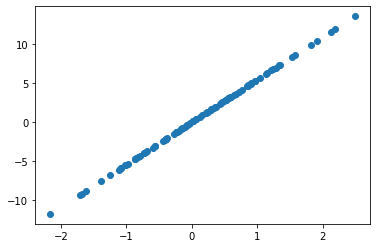

In [25]:
plt.scatter(X_test, y_pred)

## Maliyet Fonksiyonu

Verilen veriler için bir Makine Öğrenimi modelinin performansını ölçen bir işlevdir. Maliyet Fonksiyonu, tahmin edilen değerler ile beklenen değerler arasındaki hatayı nicelendirir ve bunu tek bir gerçek sayı şeklinde sunar.

In [7]:
def mse(predictions, targets):
    samples_num = len(predictions)
    accumulated_error = 0.0
    for prediction, target in zip(predictions, targets):
        accumulated_error += (prediction - target)**2
       
    mae_error = (1.0 / (2*samples_num)) * accumulated_error
    
    return mae_error

In [8]:
mse(y_pred, y)

5399.844699954652

In [9]:
from sklearn.metrics import mean_squared_error

In [10]:
mean_squared_error(y, y_pred)


10799.689399909304

## 9.3 Lojistik Regresyon

Lojistik regresyon, temel bir sınıflandırma tekniğidir. Doğrusal sınıflandırıcılar grubuna aittir ve biraz polinom ve doğrusal regresyona benzer. Lojistik regresyon hızlıdır ve nispeten karmaşık değildir ve sonuçları yorumlamanız sizin için uygundur. Esasen ikili sınıflandırma için bir yöntem olmasına rağmen, çok sınıflı problemlere de uygulanabilir.

Lojistik regresyonun ne olduğunu ve nasıl çalıştığını anlamak için sigmoid işlevini ve doğal logaritma işlevini anlamanız gerekir.

Bu görüntü, bazı değişken 𝑥'nin sigmoid fonksiyonunu (veya S-şekilli eğri) gösterir:

![](assets/logistic-regression.jpeg)


Sigmoid işlevi, etki alanının çoğunda 0 veya 1'e çok yakın değerlere sahiptir. Bu gerçek onu sınıflandırma yöntemlerinde uygulamaya uygun hale getirir.

## Tek Değişkenli Lojistik Regresyon

Tek değişkenli lojistik regresyon, lojistik regresyonun en basit halidir. 𝐱 = 𝑥 olan tek bir bağımsız değişken (veya özellik) vardır. Bu şekil, tek değişkenli lojistik regresyonu göstermektedir:

![](assets/logistic-regression2.jpg)

Burada, yeşil dairelerle temsil edilen belirli bir girdi-çıktı (veya 𝑥-𝑦) çifti kümesine sahipsiniz. Bunlar sizin gözlemlerinizdir. Unutmayın ki, 𝑦 sadece 0 veya 1 olabilir. Örneğin, en soldaki yeşil dairenin girişi 𝑥 = 0 ve gerçek çıktı 𝑦 = 0'dır. En sağdaki gözlem 𝑥 = 9 ve 𝑦 = 1'dir.

Lojistik regresyon, maksimum LLF'ye karşılık gelen 𝑏₀ ve 𝑏₁ ağırlıklarını bulur. Bu ağırlıklar, kesikli siyah çizgi olan 𝑓 (𝑥) = 𝑏₀ + 𝑏₁𝑥 logitini tanımlar. Ayrıca burada tam siyah çizgi olarak gösterilen tahmin edilen olasılığı define (𝑥) = 1 / (1 + exp (−𝑓 (𝑥))) tanımlarlar. Bu durumda, 𝑝 (𝑥) = 0,5 ve 𝑓 (𝑥) = 0 eşiği, 𝑥'nin 3'ten biraz daha büyük değerine karşılık gelir. Bu değer, tahmin edilen çıkışlar 0 ve 1 olan girişler arasındaki sınırdır.

## Python ile

In [12]:
import matplotlib.pyplot as plt
import numpy as np

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [15]:
model = LogisticRegression()
model.fit(x, y)

LogisticRegression()

In [17]:
print("Classes: ", model.classes_)
print("Intercept: ",model.intercept_)
print("Coef: ",model.coef_)

Classes:  [0 1]
Intercept:  [-4.12617727]
Coef:  [[1.18109091]]


In [18]:
print("Probability: ",model.predict_proba(x))

Probability:  [[0.98411203 0.01588797]
 [0.95003074 0.04996926]
 [0.85370936 0.14629064]
 [0.64173546 0.35826454]
 [0.35475873 0.64524127]
 [0.1443924  0.8556076 ]
 [0.04924876 0.95075124]
 [0.01565079 0.98434921]
 [0.00485659 0.99514341]
 [0.00149573 0.99850427]]


In [19]:
model.predict(x)

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

## Evaluate

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

In [23]:
confusion_matrix(y, model.predict(x))

array([[4, 0],
       [0, 6]])

In [24]:
import seaborn as sns

In [25]:
cm = confusion_matrix(y, model.predict(x))
cm

array([[4, 0],
       [0, 6]])

<AxesSubplot:>

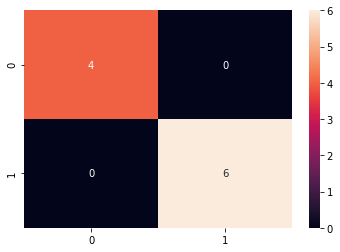

In [26]:
sns.heatmap(cm, annot=True)